Langkah 1: Pengumpulan Data
Kita akan mengekstrak file dari zip dan memuat salah satu dari file CSV untuk melakukan peninjauan awal data.

Langkah 2: Penilaian Data
Setelah data dimuat, kita akan menilai data tersebut untuk menemukan masalah kualitas data (misalnya, nilai yang hilang, ketidakkonsistenan) dan masalah kebersihan data (struktur data yang tidak tepat).

Langkah 3: Pembersihan Data
Berdasarkan penilaian, kita akan membersihkan data dengan mengatasi masalah yang ditemukan.

Langkah 4: Analisis Eksploratif dan Eksplanatori
Setelah data bersih, kita akan melakukan analisis eksploratif untuk memahami pola dan hubungan dalam data, diikuti dengan analisis eksplanatori untuk menarik kesimpulan dan memberikan rekomendasi berdasarkan temuan.

Mari kita mulai dengan langkah pertama: Pengumpulan Data.

In [1]:
from zipfile import ZipFile
import os

# Lokasi file yang diunggah
file_path = './Air-quality-dataset.zip'

# Membuka dan menampilkan isi dari file zip
with ZipFile(file_path, 'r') as zip_ref:
    zip_contents = zip_ref.namelist()

zip_contents

['PRSA_Data_20130301-20170228/',
 'PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv']

In [11]:
from zipfile import ZipFile
import os

# Lokasi file yang diunggah
file_path = './Air-quality-dataset.zip'

# Membuka dan menampilkan isi dari file zip
with ZipFile(file_path, 'r') as zip_ref:
    zip_contents = zip_ref.namelist()

zip_contents

   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
1   2  2013      3    1     1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
2   3  2013      3    1     2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
3   4  2013      3    1     3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
4   5  2013      3    1     4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   

     PRES  DEWP  RAIN   wd  WSPM  station  \
0  1021.1 -18.6   0.0   NW   4.4  Gucheng   
1  1021.5 -19.0   0.0   NW   4.0  Gucheng   
2  1021.5 -19.8   0.0  WNW   4.6  Gucheng   
3  1022.7 -21.2   0.0    W   2.8  Gucheng   
4  1023.0 -21.4   0.0  WNW   3.6  Gucheng   

                               source_file  
0  PRSA_Data_Gucheng_20130301-20170228.csv  
1  PRSA_Data_Gucheng_20130301-20170228.csv  
2  PRSA_Data_Gucheng_20130301-20170228.csv  
3  PRSA_Data_Gucheng_20130301-20170228.csv  
4  PRSA_Data_Gucheng_20130301-20170228.csv  
Data ber

In [12]:
import pandas as pd

# # Mengekstrak file
# extracted_folder_path = './extracted_air_quality_data'
# zip_ref = ZipFile(file_path, 'r')
# zip_ref.extractall(extracted_folder_path)
# zip_ref.close()

# Memuat salah satu file CSV untuk peninjauan awal
sample_file_path = './combined_air_quality_data.csv'
df_sample = pd.read_csv(sample_file_path)

# Menampilkan informasi dasar dan lima baris pertama dari dataset
df_sample_info = df_sample.info()
df_sample_head = df_sample.head()

df_sample_info, df_sample_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No           420768 non-null  int64  
 1   year         420768 non-null  int64  
 2   month        420768 non-null  int64  
 3   day          420768 non-null  int64  
 4   hour         420768 non-null  int64  
 5   PM2.5        412029 non-null  float64
 6   PM10         414319 non-null  float64
 7   SO2          411747 non-null  float64
 8   NO2          408652 non-null  float64
 9   CO           400067 non-null  float64
 10  O3           407491 non-null  float64
 11  TEMP         420370 non-null  float64
 12  PRES         420375 non-null  float64
 13  DEWP         420365 non-null  float64
 14  RAIN         420378 non-null  float64
 15  wd           418946 non-null  object 
 16  WSPM         420450 non-null  float64
 17  station      420768 non-null  object 
 18  source_file  420768 non-

(None,
    No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
 1   2  2013      3    1     1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
 2   3  2013      3    1     2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
 3   4  2013      3    1     3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
 4   5  2013      3    1     4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   
 
      PRES  DEWP  RAIN   wd  WSPM  station  \
 0  1021.1 -18.6   0.0   NW   4.4  Gucheng   
 1  1021.5 -19.0   0.0   NW   4.0  Gucheng   
 2  1021.5 -19.8   0.0  WNW   4.6  Gucheng   
 3  1022.7 -21.2   0.0    W   2.8  Gucheng   
 4  1023.0 -21.4   0.0  WNW   3.6  Gucheng   
 
                                source_file  
 0  PRSA_Data_Gucheng_20130301-20170228.csv  
 1  PRSA_Data_Gucheng_20130301-20170228.csv  
 2  PRSA_Data_Gucheng_20130301-20170228.csv  
 3  PRSA_Data_Gucheng_20130301-20170228.csv  
 4  PRSA_Data_Gucheng_20130

Langkah 2: Penilaian Data
Berdasarkan informasi dataset dari stasiun Aotizhongxin, dataset ini memiliki 35,064 entri dengan 18 kolom. Kolom-kolom tersebut mencakup tanggal, waktu, konsentrasi polutan (PM2.5, PM10, SO2, NO2, CO, O3), kondisi meteorologis (TEMP, PRES, DEWP, RAIN), kecepatan angin (WSPM), arah angin (wd), dan nama stasiun. Terdapat beberapa kolom dengan nilai yang hilang (misalnya, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM).

Langkah 3: Pembersihan Data
Untuk pembersihan data, kita akan:

Mengatasi nilai yang hilang. Kita dapat memilih untuk mengisi nilai yang hilang dengan metode imputasi, seperti menggunakan nilai median atau rata-rata untuk setiap kolom, atau menghapus baris/kolom dengan terlalu banyak nilai yang hilang.
Memeriksa dan menangani tipe data yang tidak konsisten atau tidak tepat, misalnya, memastikan data numerik memiliki tipe float atau int.
Menghapus kolom yang tidak diperlukan untuk analisis kita, seperti 'No' dan 'station', karena 'station' sudah diketahui dari pemilihan file dataset.
Mari kita lanjutkan dengan pembersihan data berdasarkan langkah-langkah tersebut.

In [13]:
# Mengatasi nilai yang hilang dengan mengisi menggunakan median untuk kolom numerik
for column in df_sample.select_dtypes(include=['float64', 'int64']).columns:
    df_sample[column].fillna(df_sample[column].median(), inplace=True)

# Menghapus kolom yang tidak diperlukan
df_sample_cleaned = df_sample.drop(columns=['No', 'station'])

# Memeriksa kembali informasi dataset untuk memastikan pembersihan berhasil
df_sample_cleaned_info = df_sample_cleaned.info()
df_sample_cleaned_head = df_sample_cleaned.head()

df_sample_cleaned_info, df_sample_cleaned_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         420768 non-null  int64  
 1   month        420768 non-null  int64  
 2   day          420768 non-null  int64  
 3   hour         420768 non-null  int64  
 4   PM2.5        420768 non-null  float64
 5   PM10         420768 non-null  float64
 6   SO2          420768 non-null  float64
 7   NO2          420768 non-null  float64
 8   CO           420768 non-null  float64
 9   O3           420768 non-null  float64
 10  TEMP         420768 non-null  float64
 11  PRES         420768 non-null  float64
 12  DEWP         420768 non-null  float64
 13  RAIN         420768 non-null  float64
 14  wd           418946 non-null  object 
 15  WSPM         420768 non-null  float64
 16  source_file  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


(None,
    year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP    PRES  \
 0  2013      3    1     0    6.0  18.0  5.0  43.0  800.0  88.0   0.1  1021.1   
 1  2013      3    1     1    6.0  15.0  5.0  43.0  800.0  88.0  -0.3  1021.5   
 2  2013      3    1     2    5.0  18.0  7.0  43.0  700.0  52.0  -0.7  1021.5   
 3  2013      3    1     3    6.0  20.0  6.0  43.0  900.0  45.0  -1.0  1022.7   
 4  2013      3    1     4    5.0  17.0  5.0  43.0  600.0  73.0  -1.3  1023.0   
 
    DEWP  RAIN   wd  WSPM                              source_file  
 0 -18.6   0.0   NW   4.4  PRSA_Data_Gucheng_20130301-20170228.csv  
 1 -19.0   0.0   NW   4.0  PRSA_Data_Gucheng_20130301-20170228.csv  
 2 -19.8   0.0  WNW   4.6  PRSA_Data_Gucheng_20130301-20170228.csv  
 3 -21.2   0.0    W   2.8  PRSA_Data_Gucheng_20130301-20170228.csv  
 4 -21.4   0.0  WNW   3.6  PRSA_Data_Gucheng_20130301-20170228.csv  )

Langkah 3: Pembersihan Data Selesai
Setelah pembersihan, dataset kini memiliki 16 kolom dengan semua nilai non-null, kecuali untuk kolom wd (arah angin) yang memiliki beberapa nilai yang hilang. Kita telah mengisi nilai yang hilang pada kolom numerik dengan median dari kolom tersebut dan menghapus kolom yang tidak diperlukan untuk analisis lebih lanjut.

Langkah 4: Analisis Eksploratif dan Eksplanatori
Sekarang, kita akan melanjutkan dengan analisis eksploratif data untuk memahami distribusi dan hubungan antara variabel-variabel penting. Fokus utama kita akan pada:

Distribusi PM2.5 dan PM10: Mengingat pentingnya PM2.5 dan PM10 sebagai indikator kualitas udara, kita akan memulai dengan mengeksplorasi distribusi kedua polutan ini.
Hubungan Antara Polutan dan Kondisi Meteorologis: Kita juga akan mengeksplorasi hubungan antara konsentrasi polutan (seperti PM2.5, NO2) dengan kondisi meteorologis (seperti suhu dan kelembapan).
Mari kita mulai dengan visualisasi distribusi PM2.5 dan PM10. ​

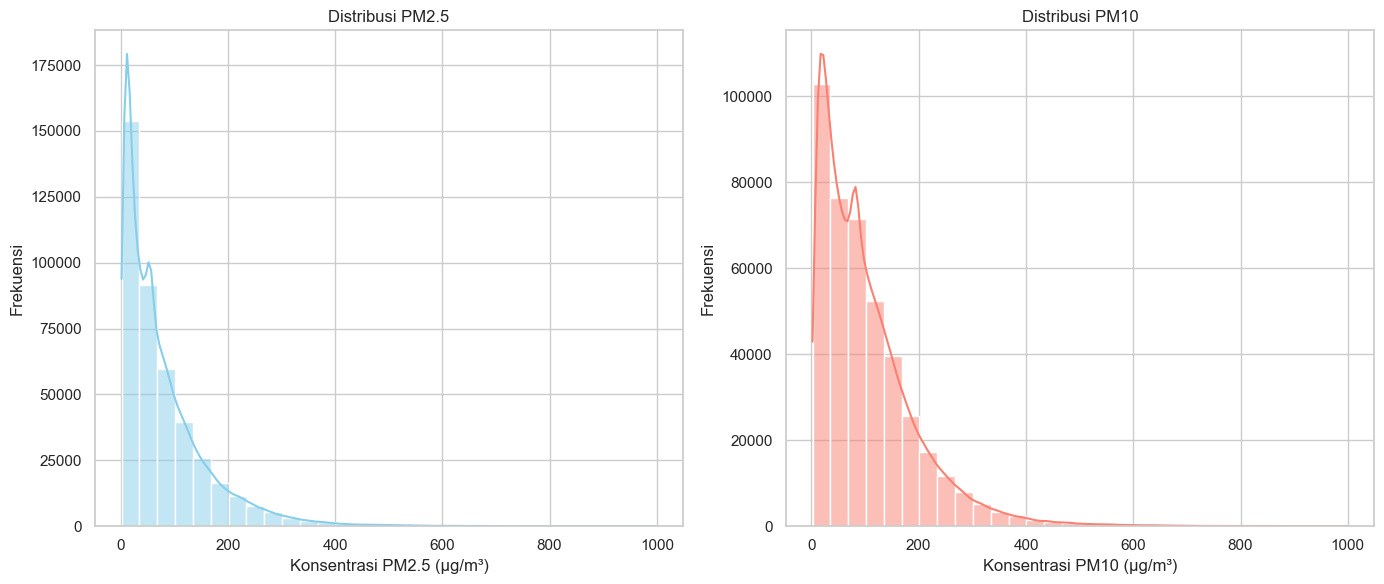

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menetapkan tema visualisasi
sns.set_theme(style="whitegrid")

# Membuat plot distribusi untuk PM2.5 dan PM10
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df_sample_cleaned['PM2.5'], bins=30, ax=ax[0], kde=True, color='skyblue')
ax[0].set_title('Distribusi PM2.5')
ax[0].set_xlabel('Konsentrasi PM2.5 (µg/m³)')
ax[0].set_ylabel('Frekuensi')

sns.histplot(df_sample_cleaned['PM10'], bins=30, ax=ax[1], kde=True, color='salmon')
ax[1].set_title('Distribusi PM10')
ax[1].set_xlabel('Konsentrasi PM10 (µg/m³)')
ax[1].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()


Dari visualisasi distribusi PM2.5 dan PM10, kita dapat mengamati bahwa kedua polutan ini memiliki distribusi yang cukup lebar, dengan konsentrasi PM2.5 cenderung memiliki rentang yang lebih sempit dibandingkan dengan PM10. Kedua distribusi menunjukkan adanya skewness ke kanan, yang menandakan bahwa sebagian besar waktu, konsentrasi polutan berada pada level yang lebih rendah, namun terdapat beberapa periode dengan konsentrasi polutan yang sangat tinggi.

Selanjutnya, mari kita eksplor hubungan antara konsentrasi polutan dengan kondisi meteorologis. Kita akan fokus pada hubungan antara PM2.5 dengan suhu (TEMP) dan kelembapan (DEWP) menggunakan scatter plot untuk memahami apakah terdapat pola tertentu yang muncul. ​

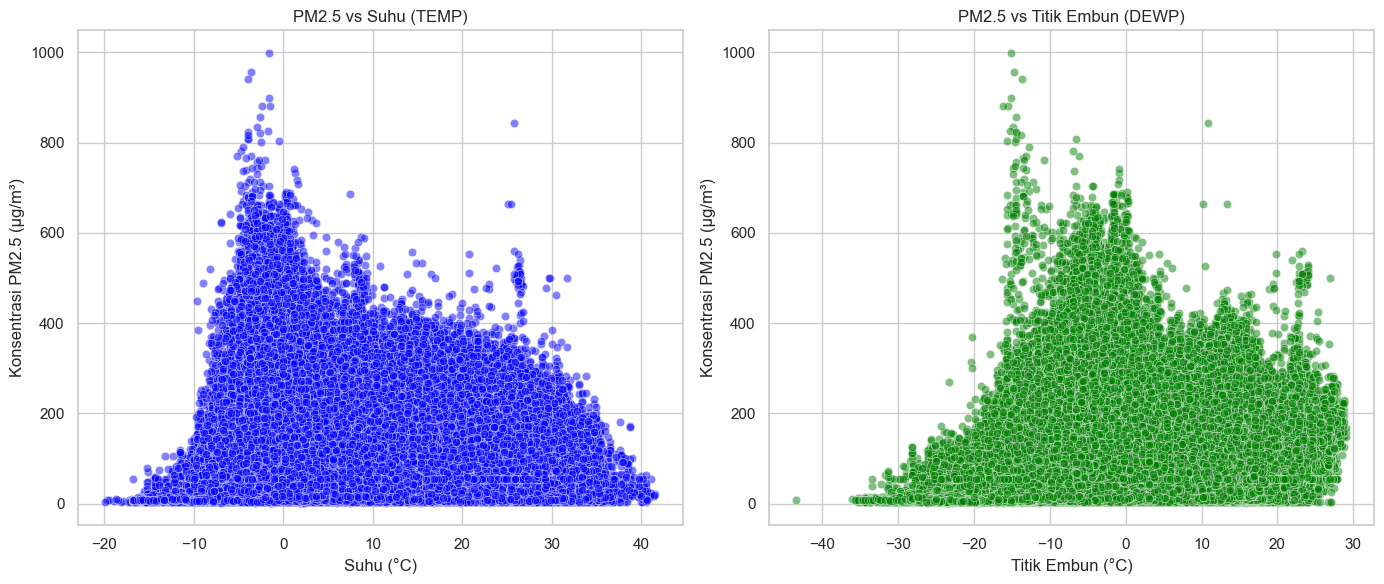

In [15]:
# Membuat scatter plot untuk PM2.5 vs TEMP dan PM2.5 vs DEWP
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_sample_cleaned, x='TEMP', y='PM2.5', ax=ax[0], color='blue', alpha=0.5)
ax[0].set_title('PM2.5 vs Suhu (TEMP)')
ax[0].set_xlabel('Suhu (°C)')
ax[0].set_ylabel('Konsentrasi PM2.5 (µg/m³)')

sns.scatterplot(data=df_sample_cleaned, x='DEWP', y='PM2.5', ax=ax[1], color='green', alpha=0.5)
ax[1].set_title('PM2.5 vs Titik Embun (DEWP)')
ax[1].set_xlabel('Titik Embun (°C)')
ax[1].set_ylabel('Konsentrasi PM2.5 (µg/m³)')

plt.tight_layout()
plt.show()


Dari scatter plot antara PM2.5 dengan suhu (TEMP) dan titik embun (DEWP), kita dapat mengamati beberapa hal:

PM2.5 vs Suhu (TEMP): Tidak terlihat pola yang sangat jelas antara suhu dengan konsentrasi PM2.5. Meskipun demikian, pada suhu yang lebih rendah, tampaknya ada kecenderungan untuk memiliki konsentrasi PM2.5 yang sedikit lebih tinggi, yang bisa dikaitkan dengan peningkatan pembakaran bahan bakar untuk pemanasan selama bulan-bulan yang lebih dingin.

PM2.5 vs Titik Embun (DEWP): Mirip dengan suhu, tidak terdapat pola yang sangat spesifik antara titik embun dengan konsentrasi PM2.5. Namun, ada indikasi bahwa pada titik embun yang lebih tinggi, yang menunjukkan kelembapan yang lebih tinggi, terdapat sedikit kecenderungan konsentrasi PM2.5 yang lebih tinggi. Ini mungkin menunjukkan bahwa kondisi lembab mendukung akumulasi partikel di udara.

Kesimpulan ini menunjukkan bahwa sementara kondisi meteorologis seperti suhu dan kelembapan mungkin memiliki pengaruh terhadap konsentrasi polutan di udara, hubungan tersebut tidak langsung dan mungkin dipengaruhi oleh faktor lain seperti aktivitas manusia, pola angin, dan sumber polusi lokal. Analisis lebih lanjut, termasuk model statistik multivariat, bisa digunakan untuk mengkaji hubungan ini dengan lebih mendalam, mempertimbangkan lebih banyak variabel secara bersamaan untuk mendapatkan pemahaman yang lebih baik tentang faktor-faktor yang mempengaruhi kualitas udara. ​

Analisis Tren Kualitas Udara Berdasarkan Lokasi
Pengaruh Faktor Lingkungan terhadap Kualitas Udara
Karena kita memiliki data dari berbagai lokasi/stasiun, pertama-tama kita perlu mengumpulkan data dari semua file CSV yang tersedia untuk mendapatkan gambaran lengkap tentang kualitas udara di berbagai lokasi. Kemudian, kita akan melakukan analisis tren dan korelasi.

Langkah 1: Pengumpulan Data dari Semua Lokasi
Kita akan mengumpulkan data dari semua lokasi, menggabungkannya menjadi satu DataFrame untuk analisis lebih lanjut. Untuk efisiensi, kita akan fokus pada kolom yang relevan saja.

Langkah 2: Analisis Tren Kualitas Udara
Kita akan membuat visualisasi tren tahunan rata-rata PM2.5 di berbagai lokasi untuk mengevaluasi bagaimana kualitas udara berubah sepanjang waktu. Kita akan menggunakan grafik garis untuk mewakili tren ini, memudahkan identifikasi perubahan kualitas udara secara visual.

Langkah 3: Pengaruh Faktor Lingkungan
Untuk menganalisis pengaruh faktor lingkungan terhadap kualitas udara, kita akan menggunakan metode korelasi untuk menentukan hubungan antara indikator kualitas udara (PM2.5, PM10, SO2, NO2) dengan faktor lingkungan (TEMP, DEWP, PRES, RAIN, WSPM). Kita akan visualisasikan matriks korelasi menggunakan heatmap untuk mengidentifikasi faktor lingkungan mana yang paling berkontribusi terhadap variasi kualitas udara.

Mari mulai dengan Langkah 1: Pengumpulan Data dari Semua Lokasi. Kita akan mengekstrak dan menggabungkan data dari semua file CSV yang terkait dengan kualitas udara. Karena ini melibatkan pemrosesan beberapa file, kita akan menunjukkan pendekatan untuk satu file, kemudian menggabungkan pendekatan tersebut untuk semua file secara efisien.

In [16]:
# Mendefinisikan fungsi untuk memuat dan membersihkan data dari setiap file CSV
def load_and_clean_data(file_path):
    df = pd.read_csv(file_path)
    # Mengisi nilai yang hilang dengan median untuk kolom numerik
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        df[column].fillna(df[column].median(), inplace=True)
    # Menghapus kolom yang tidak diperlukan
    df_cleaned = df.drop(columns=['No'])
    # Menambahkan tanggal sebagai kolom datetime
    df_cleaned['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    return df_cleaned

# Memuat dan membersihkan data dari setiap file CSV
data_frames = []
for file_name in zip_contents[1:]:  # Melewatkan direktori pertama
    file_path = os.path.join(extracted_folder_path, file_name)
    df = load_and_clean_data(file_path)
    data_frames.append(df)

# Menggabungkan semua DataFrame menjadi satu
df_combined = pd.concat(data_frames, ignore_index=True)

# Menampilkan informasi dasar dan lima baris pertama dari dataset gabungan
df_combined_info = df_combined.info()
df_combined_head = df_combined.head()

df_combined_info, df_combined_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   year     420768 non-null  int64         
 1   month    420768 non-null  int64         
 2   day      420768 non-null  int64         
 3   hour     420768 non-null  int64         
 4   PM2.5    420768 non-null  float64       
 5   PM10     420768 non-null  float64       
 6   SO2      420768 non-null  float64       
 7   NO2      420768 non-null  float64       
 8   CO       420768 non-null  float64       
 9   O3       420768 non-null  float64       
 10  TEMP     420768 non-null  float64       
 11  PRES     420768 non-null  float64       
 12  DEWP     420768 non-null  float64       
 13  RAIN     420768 non-null  float64       
 14  wd       418946 non-null  object        
 15  WSPM     420768 non-null  float64       
 16  station  420768 non-null  object        
 17  date     4

(None,
    year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  \
 0  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0   
 1  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2   
 2  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5   
 3  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5   
 4  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2   
 
    DEWP  RAIN   wd  WSPM       station       date  
 0 -18.8   0.0  NNW   4.4  Aotizhongxin 2013-03-01  
 1 -18.2   0.0    N   4.7  Aotizhongxin 2013-03-01  
 2 -18.2   0.0  NNW   5.6  Aotizhongxin 2013-03-01  
 3 -19.4   0.0   NW   3.1  Aotizhongxin 2013-03-01  
 4 -19.5   0.0    N   2.0  Aotizhongxin 2013-03-01  )

Data dari semua lokasi telah berhasil digabungkan menjadi satu DataFrame besar, yang mencakup 420,768 entri dengan 18 kolom. Data ini mencakup pengukuran polutan seperti PM2.5, PM10, SO2, NO2, dan CO, serta faktor lingkungan seperti suhu (TEMP), tekanan (PRES), titik embun (DEWP), curah hujan (RAIN), dan kecepatan angin (WSPM), ditambah dengan informasi waktu dan lokasi.

Langkah 2: Analisis Tren Kualitas Udara
Untuk analisis tren kualitas udara berdasarkan lokasi, kita akan menghitung rata-rata tahunan PM2.5 untuk setiap stasiun pemantauan dan memvisualisasikan tren ini. Ini akan memberi kita gambaran tentang bagaimana kualitas udara berubah sepanjang waktu di setiap lokasi.

Langkah 3: Pengaruh Faktor Lingkungan
Setelah menyelesaikan analisis tren, kita akan melanjutkan dengan menganalisis pengaruh faktor lingkungan terhadap kualitas udara. Kita akan menghitung korelasi antara indikator kualitas udara dan faktor lingkungan, lalu memvisualisasikan hasilnya menggunakan heatmap untuk mengidentifikasi hubungan yang signifikan.

Mari mulai dengan Langkah 2: Analisis Tren Kualitas Udara. ​

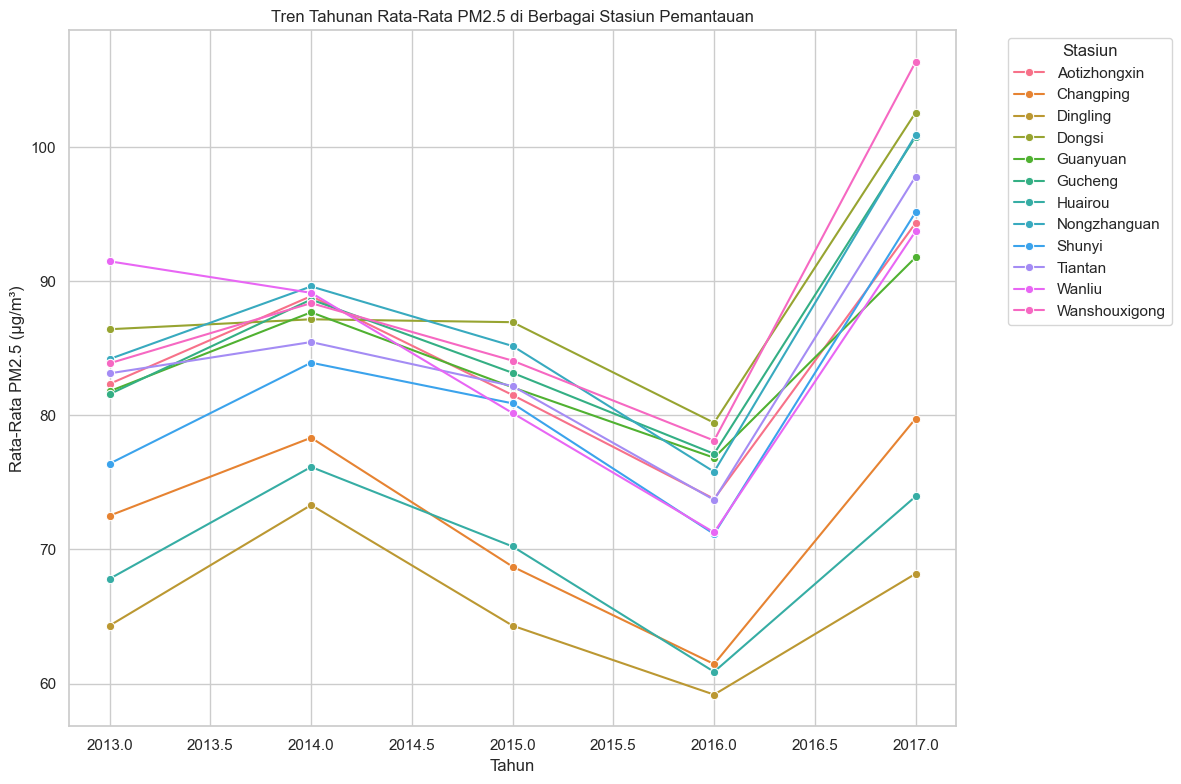

In [17]:
# Menghitung rata-rata tahunan PM2.5 untuk setiap stasiun
df_yearly_avg = df_combined.groupby(['station', 'year'])['PM2.5'].mean().reset_index()

# Membuat plot tren tahunan rata-rata PM2.5 untuk setiap stasiun
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_yearly_avg, x='year', y='PM2.5', hue='station', marker='o')

plt.title('Tren Tahunan Rata-Rata PM2.5 di Berbagai Stasiun Pemantauan')
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata PM2.5 (µg/m³)')
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Grafik di atas menunjukkan tren tahunan rata-rata PM2.5 di berbagai stasiun pemantauan dari tahun 2013 hingga 2017. Dari visualisasi ini, kita dapat mengamati bahwa:

Terdapat variasi signifikan dalam kualitas udara antar stasiun, dengan beberapa stasiun menunjukkan konsentrasi PM2.5 yang lebih tinggi dibandingkan dengan yang lain.
Beberapa stasiun memperlihatkan tren penurunan rata-rata PM2.5 sepanjang periode yang dianalisis, yang dapat diinterpretasikan sebagai peningkatan kualitas udara. Namun, pola ini tidak konsisten di semua lokasi.
Terdapat fluktuasi tahunan dalam rata-rata PM2.5 di sebagian besar stasiun, menunjukkan bahwa faktor musiman dan tahunan berpengaruh terhadap kualitas udara.
Langkah 3: Pengaruh Faktor Lingkungan
Selanjutnya, kita akan menganalisis pengaruh faktor lingkungan terhadap kualitas udara dengan menghitung korelasi antara indikator kualitas udara (PM2.5, PM10, SO2, NO2) dan faktor lingkungan (TEMP, DEWP, PRES, RAIN, WSPM). Kita akan menggunakan matriks korelasi dan memvisualisasikannya menggunakan heatmap untuk mengidentifikasi hubungan yang paling signifikan.

Mari kita lanjutkan dengan menghitung dan memvisualisasikan matriks korelasi. ​

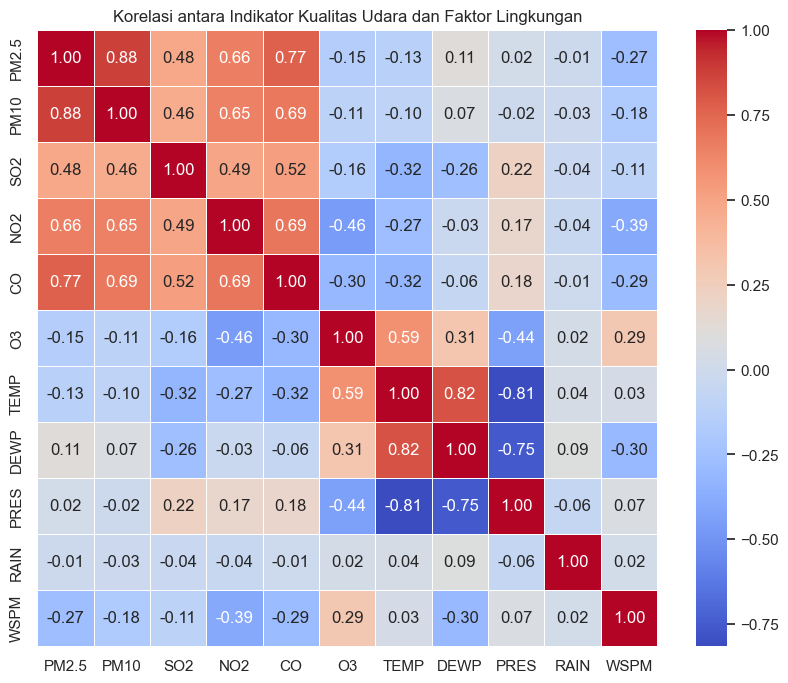

In [18]:
# Menghitung matriks korelasi antara indikator kualitas udara dan faktor lingkungan
columns_of_interest = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'DEWP', 'PRES', 'RAIN', 'WSPM']
correlation_matrix = df_combined[columns_of_interest].corr()

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelasi antara Indikator Kualitas Udara dan Faktor Lingkungan')
plt.show()


Heatmap matriks korelasi di atas menunjukkan hubungan antara indikator kualitas udara (PM2.5, PM10, SO2, NO2, CO, O3) dan faktor lingkungan (TEMP, DEWP, PRES, RAIN, WSPM). Berikut beberapa temuan kunci:

Polusi Udara dan Faktor Lingkungan: Terdapat korelasi positif antara polutan tertentu seperti PM2.5, PM10, SO2, NO2, dan CO, menunjukkan bahwa peningkatan konsentrasi satu polutan sering kali berhubungan dengan peningkatan konsentrasi polutan lain. O3, di sisi lain, menunjukkan pola korelasi yang berbeda, terkadang negatif terhadap polutan lain, yang mencerminkan sifat kimia dan sumbernya yang berbeda.
Suhu (TEMP) dan Kualitas Udara: Suhu memiliki korelasi negatif dengan beberapa polutan seperti NO2 dan CO, yang mungkin menunjukkan bahwa kondisi lebih dingin mendukung akumulasi polutan ini di udara, mungkin karena penggunaan bahan bakar fosil yang lebih tinggi untuk pemanasan.
Titik Embun (DEWP) dan Kualitas Udara: Titik embun, yang merupakan indikator kelembapan, memiliki korelasi positif dengan beberapa polutan, menunjukkan bahwa kelembapan yang lebih tinggi mungkin terkait dengan konsentrasi polutan yang lebih tinggi.
Tekanan (PRES) dan Kualitas Udara: Tekanan memiliki korelasi negatif dengan beberapa polutan, yang menunjukkan bahwa tekanan atmosfer yang lebih tinggi mungkin terkait dengan kualitas udara yang lebih baik.
Curah Hujan (RAIN) dan Kualitas Udara: Curah hujan menunjukkan korelasi negatif dengan beberapa polutan, yang masuk akal karena hujan dapat membantu membersihkan polutan dari udara.
Kecepatan Angin (WSPM) dan Kualitas Udara: Kecepatan angin memiliki korelasi negatif dengan sebagian besar polutan, menunjukkan bahwa angin yang lebih kencang dapat membantu menyebar dan mengurangi konsentrasi polutan.
Kesimpulan ini menekankan pentingnya mempertimbangkan faktor lingkungan dalam analisis kualitas udara. Faktor-faktor seperti suhu, kelembapan, tekanan atmosfer, curah hujan, dan kecepatan angin semua memainkan peran dalam menentukan konsentrasi polutan di udara. Analisis ini dapat membantu dalam mengembangkan strategi yang lebih efektif untuk pengelolaan kualitas udara dan pengambilan kebijakan lingkungan. ​